# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Вам нужно научиться определять рыночную стоимость объектов недвижимости. Для этого проведите исследовательский анализ данных и установите параметры, влияющие на цену объектов. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность.

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта и других объектов — эти данные автоматически получены из геосервисов. Количество парков и водоёмов также заполняется без участия пользователя.

Для проведения анализа потребуется выполнить следующие основные задачи:
1) изучить общую информацию о датафрейме и построить гистограммы для его числовых столбцов.

2) выполнить предобработку данных: заполнить пропуски в данных там, где это возможно; рассмотреть типы данных, преобразовать там, где это необходимо; устранить неявные дубликаты.

3) добавить новые столбцы в таблицу (цена одного квадратного метра;день недели публикации объявления; месяц публикации объявления; год публикации объявления; тип этажа квартиры;расстояние до центра города в километрах).

4) удалить аномальные значения; изучить, как быстро продавались квартиры; определить факторы, которые больше всего влияют на стоимость; посчитать среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений; вычислить среднюю стоимость квартир в Санкт-Петербурге на разном удалении от центра.

5) написать общий вывод.

### Откройте файл с данными и изучите общую информацию

**Импортируем библиотеку pandas. Считаем данные из csv-файла в датафрейм и сохраним в переменную data.**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress
import numpy as np
import seaborn as sns

In [2]:
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')

**Выведим нескольско строк датафрейма.**

In [3]:
data.head(20)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


**Рассмотрим основную информацию о датафрейме.**

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

**Построим гистограмму для всех числовых столбцов таблицы на одном графике.**

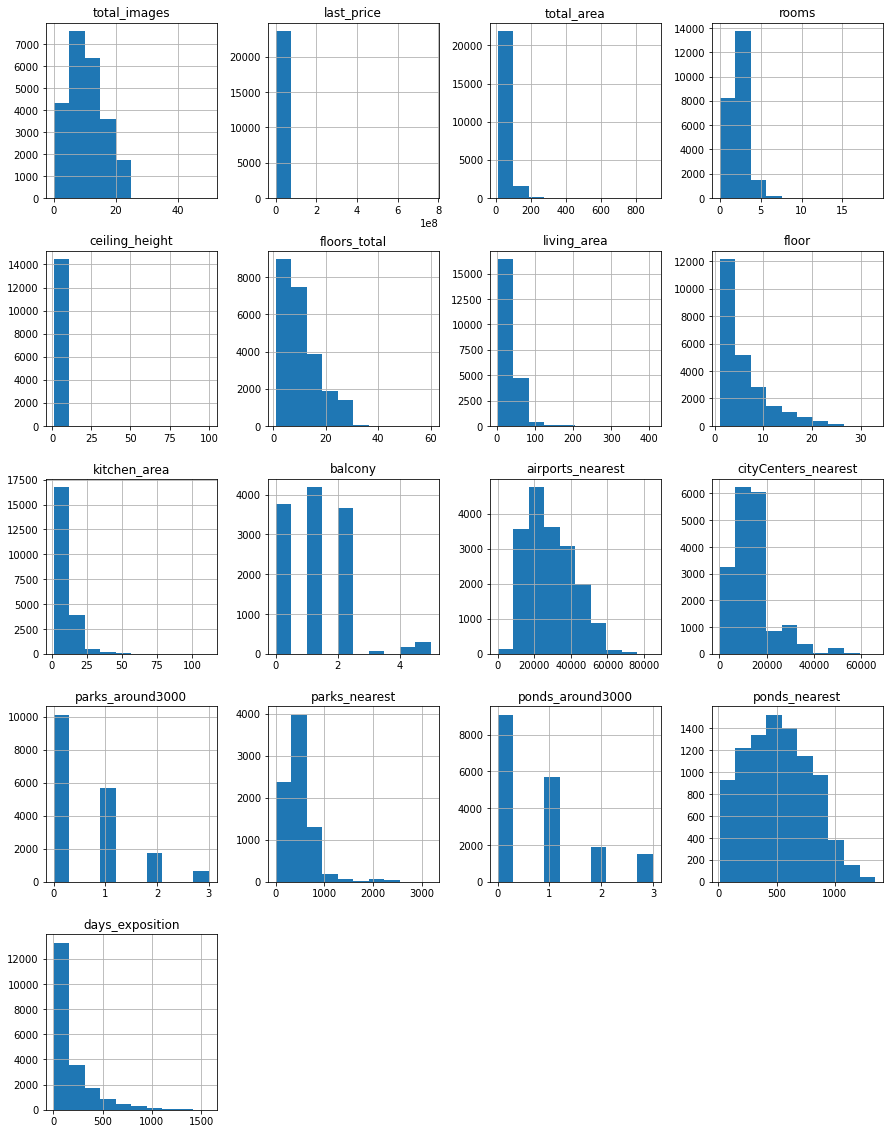

In [5]:
data.hist(figsize=(15, 20));

**Распределение некоторых параметров сильно скошено вправо, что говорит о наличии небольшого числа объектов с аномальными значениями. Большинство квартир относится к среднему классу: площадь до 100 кв. м, 1–3 комнаты. Квартиры в основном продаются меньше чем за 100 дней.**


### Выполните предобработку данных

**Рассмотрим количество пропусков для каждого столбца.**

#### Изучение пропусков и их заполнение 

In [6]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

**Можно заметить, что присутствует большое количество пропусков в данных. Для начала рассмотрим столбцец `ceiling_height`. В большинстве случаев выосты потоков не сильно отличаются в разных домах. Можно заполнить пропуски в данном столбце медианным значением.**

In [7]:
# check
# пропущенные значения бары

def pass_value_barh(dfg):
    try:
        (
            (dfg.isna().mean()*100)
            .to_frame()
            .rename(columns = {0:'space'})
            .query('space > 0')
            .sort_values(by = 'space', ascending = True)
            .plot(kind = 'barh', figsize = (19,6), rot = -5, legend = False, fontsize = 16)
            .set_title('Пример' + "\n", fontsize = 22, color = 'SteelBlue')    
        );    
    except:
        print('пропусков не осталось :) или произошла ошибка в первой части функции ')

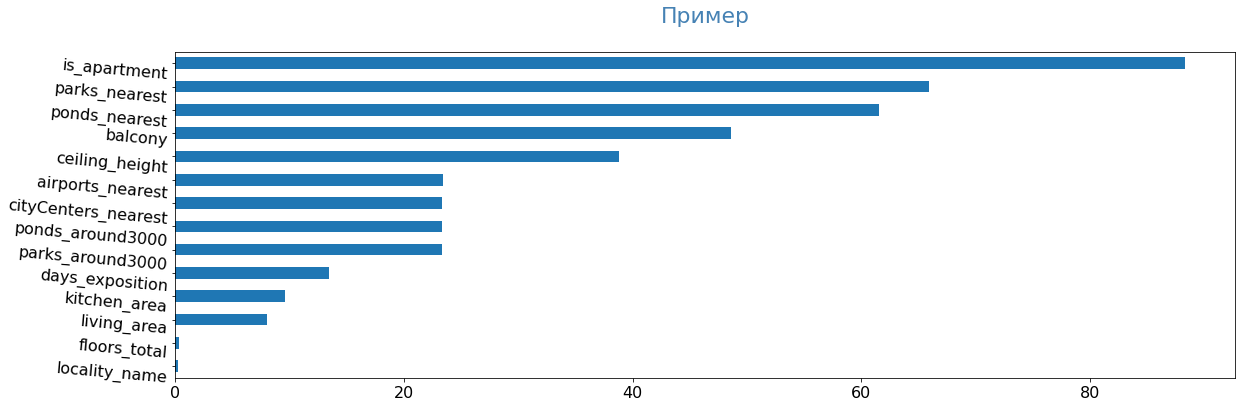

In [8]:
pass_value_barh(data)

In [9]:
def pass_value_barh_1(dfg):
    try:
        (
            (dfg.isna().mean()*100)
            .to_frame()
            .rename(columns = {0: 'space'})
            .query('space > 0')
            .sort_values(by = 'space', ascending = True)
            .plot(kind = 'barh', figsize = (19, 6), color = 'skyblue', edgecolor = 'black', legend = False, fontsize = 14)
            .set_title('Процент пропущенных значений по столбцам' + "\n", fontsize = 20, color = 'SteelBlue', pad=20)
        )
    except:
        print('Пропусков не осталось :) или произошла ошибка в первой части функции')


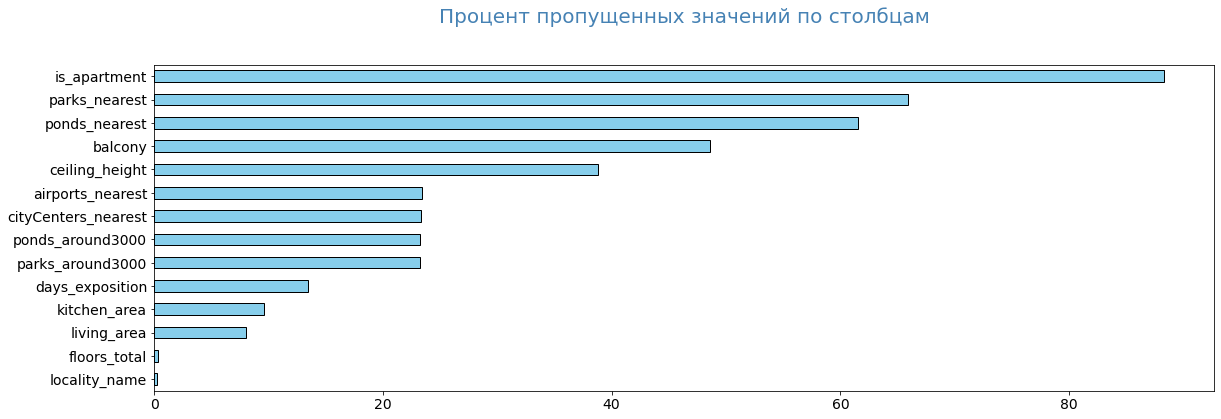

In [10]:
pass_value_barh_1(data)

In [11]:
data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].median())

In [12]:
data['ceiling_height'] = data.groupby('locality_name')['ceiling_height'].apply(lambda x: x.fillna(x.median()))

**Для столбца `floors_total` пропущенные значения также стоит заполнить медианным значением. Нельзя заполнить 0, так как нет зданий без этажей. Число пропуском очень мало по сравнению с количестовом данных, поэтому они не должны сильно повлиять на результаты.** 

In [13]:
data['floors_total'] = data['floors_total'].fillna(data['floors_total'].median())
error_floors_total = data[data['floors_total'] < data['floor']]
print(len(error_floors_total))

37


In [14]:
data.loc[data['floors_total'] < data['floor'], 'floors_total'] = data['floor']
error_floors_total = data[data['floors_total'] < data['floor']]
print(len(error_floors_total))

0


**Для столбцов `living_area` и `kitchen_area` следует посчитать отношение в среднем жилой площади к общей площади, и какое в среднем отношение бывает у кухонной площади к общей. Можно заметить, что столбец `total_area` заполнен всегда, так как эта одна из главных характеристик влияющих на цену.  Поэтому нужно заполнить пропуски в жилой и кухонной площади исходя из отношения с общей площадью. Скорее всего для продавца два данных столбца не являются обязательными к заполнению.**  


In [15]:
#living_area_median = (data['living_area'] / data['total_area']).median()
#kitchen_area_median = (data['kitchen_area'] / data['total_area'].median())
#data['living_area'] = data['living_area'].fillna(data['total_area'] * living_area_median)
#data['kitchen_area'] = data['kitchen_area'].fillna(data['total_area'] * kitchen_area_median)


living_area_median = (data['living_area'] / data['total_area']).median()
kitchen_area_median = (data['kitchen_area'] / data['total_area']).median()
data['living_area'] = data['living_area'].fillna(data['total_area'] * living_area_median)
data['kitchen_area'] = data['kitchen_area'].fillna(data['total_area'] * kitchen_area_median)

data['total_living_kitchen'] = data['living_area'] + data['kitchen_area']
anomalies = data.query('total_living_kitchen >= total_area * 0.9')

for index, row in anomalies.iterrows():
    total_living_kitchen = row['total_area'] * 0.899
    row['living_area'] = total_living_kitchen * 0.75
    row['kitchen_area'] = total_living_kitchen * 0.25
    data.loc[index, 'living_area'] = row['living_area']
    data.loc[index, 'kitchen_area'] = row['kitchen_area']

data.drop(columns=['total_living_kitchen'], inplace=True)

anomalies = data.query('total_area * 0.9 <= (living_area + kitchen_area)')
print("Аномалии:")
print(len(anomalies))

Аномалии:
0


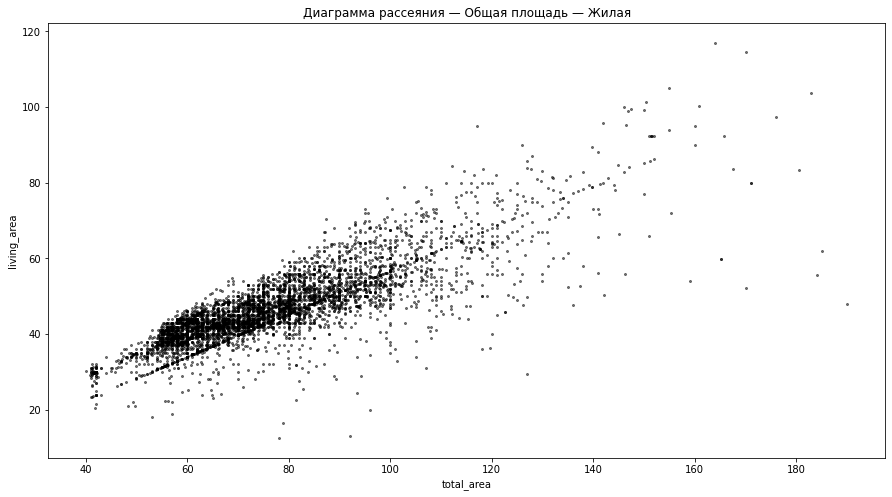

In [16]:
# check
data[data['rooms'] == 3].query('total_area < 201 and last_price < 25_000_000').plot(kind='scatter',
        y='living_area' , x='total_area', alpha=0.5, subplots=True, figsize=(15,8), c = 'black', s = 4)
plt.title('Диаграмма рассеяния — Общая площадь — Жилая');

**Столбец `is_apartment` заполнен значениями NaN или False. Поэтому пропуски стоит заменить на True.**

In [17]:
#data['is_apartment'] = data['is_apartment'].fillna('True')
data['is_apartment'] = data['is_apartment'].replace(False, True)
data['is_apartment'] = data['is_apartment'].fillna(False)

**Обычно наличие балкона только повышает стоимость жилья, поэтому в интересах продовца указывать его наличие. Пропуски в столбце `balcony` с большой вероятность указывает на его отсутсвие.**  

In [18]:
data['balcony'] = data['balcony'].fillna(0)

**Столбец `locality_name` содержит информацию о названии населенного пункта. Пропусков в данном столбце мало, скорее всего он является обязательным для заполнение, а пропуски возникли в результате технических сбоев. Следует их оставить, так как название для каждого объекта недвижимости может быть индивидуально, нельзя выявить зависимость.**

**Что же касается столбцов `airports_nearest`, `cityCenters_nearest`,  `parks_nearest`, `ponds_nearest`, то можно предположить, что данные в них должны заполняться автоматичесчки (по геолокации). Возможно, что для некоторых населенных пунктов они отсутствуют. Поэтому не получится восстановить эти данные логически, если их заполнить средними значениями, то появится риск возникновения аномальных значений. Для предотвращения искажений пропуски следует оставить.**

**Для `parks_around3000` и `ponds_around3000` значение пропусков можно заменить на 0. Если продавец их не указал, то скорее всего их нет, так как эти данные непосредственно влияют на стоимость жилья.** 

In [19]:
data['parks_around3000'] = data['parks_around3000'].fillna(0)
data['ponds_around3000'] = data['ponds_around3000'].fillna(0)

**Пропуски в столбце `days_exposition` являются информацией, а не ошибкой. Если в даном столбце пропуск, то объявление ещё не снято с публикации.**

**Проверим, остались ли пропуски в столбцах, которые мы решили заполнить новыми значениями.**

In [20]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height             49
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000            0
parks_nearest           15620
ponds_around3000            0
ponds_nearest           14589
days_exposition          3181
dtype: int64

####  Изучение типов данных столбцов и их изменение

**Изучив информацию после вызова `data.info()`, можно обратить внимания на тим данных в столбцах: `first_day_exposition`, `floors_total`, `is_apartment`, `balcony`.**

**Тип данных в `first_day_exposition` следует заменить на `datetime`, так как он содержит информацию о дате публикации.**

In [21]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'])

**Тип данных в `floors_total` следует заменить на `int`, так как количество этаже не может быть не целым числом.**

In [22]:
data['floors_total'] = data['floors_total'].astype(int)

**Тип данных в `is_apartment` следует заменить на `bool`, так как ответом на этот вопрос может быть только два заначения True или False.**

In [23]:
data['is_apartment'] = data['is_apartment'].astype(bool)

**Тип данных в `balcony` следует заменить на `int`, так как число балконов не может быть не целым числом.**

In [24]:
data['balcony'] = data['balcony'].astype(int)

**Рассмотрим уникальные значения в `locality_name`.**

In [25]:
data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

**Замени ё на е во всех названиях. Также встречаются названия одних и тех же населенных пунктов, но записанные по разному, оставим только одно название. Удалим лишнии пробелы.**

In [26]:
data['locality_name'] = (data['locality_name'].str.lower().replace('ё', 'е', regex=True).
                         replace(['поселок', 'деревня', 'городской', 'городского типа', 'село', 
                                  'станции', 'платформа', 'коттеджный','садоводческое некоммерческое товарищество', 
                                  'садовое товарищество', 'при железнодорожной станции', 'при железнодорожной'], '', regex=True)
                         .str.strip()
                        )
data['locality_name'] = (data['locality_name'].replace({'кингисеппский': 'кингисепп',
                                                       'кингисеппскийский': '',
                                                       'к лесное': 'лесное'})
                        )
data['locality_name'].unique()

array(['санкт-петербург', 'шушары', 'янино-1', 'парголово', 'мурино',
       'ломоносов', 'сертолово', 'петергоф', 'пушкин', 'кудрово',
       'коммунар', 'колпино', 'красный бор', 'гатчина', 'федоровское',
       'выборг', 'кронштадт', 'кировск', 'новое девяткино',
       'металлострой', 'лебяжье', 'сиверский', 'молодцово',
       'кузьмоловский', 'новая ропша', 'павловск', 'пикколово',
       'всеволожск', 'волхов', 'кингисепп', 'приозерск', 'сестрорецк',
       'куттузи', 'аннино', 'ефимовский', 'плодовое', 'заклинье',
       'торковичи', 'первомайское', 'красное', 'понтонный', 'сясьстрой',
       'старая', 'лесколово', 'новый свет', 'сланцы', 'путилово',
       'ивангород', 'шлиссельбург', 'никольское', 'зеленогорск',
       'сосновый бор', 'оржицы', 'кальтино', 'романовка', 'бугры',
       'рощино', 'кириши', 'луга', 'волосово', 'отрадное', 'павлово',
       'оредеж', 'копорье', 'молодежное', 'тихвин', 'победа', 'нурма',
       'синявино', 'тосно', 'стрельна', 'бокситогорск', 'але

#### check name

In [27]:
# check
data.locality_name.nunique()

304

In [28]:
key_columns = ['total_area', 'floor', 'floors_total','cityCenters_nearest', 'locality_name', 'rooms']

duplicate_rows = data[data.duplicated(subset=key_columns, keep='first')]
print(f"Количество дубликатов: {len(duplicate_rows)}")

data = data.drop_duplicates(subset=key_columns, keep='first')
print(f"Количество записей после удаления дубликатов: {len(data)}")

Количество дубликатов: 210
Количество записей после удаления дубликатов: 23489


**В данном разделе была выполнена предобработка данных:**

**1) найдено количество пропусков;**

**2) данные пропуски были заполнены там, где это это представляется возможным;**

**3) были изменены типы данных некоторых столбцов;**

**4) были удалены неявные дубликаты**

### Добавьте в таблицу новые столбцы

**Добавим столбец в котором содержится цена одного квадратного метра.**

In [29]:
data['price_per_square_meter'] = (data['last_price'] / data['total_area']).round(2)

**Добавим столбец в котором содержится информация о дне недели публикации.**

In [30]:
data['day_of_the_week'] = data['first_day_exposition'].dt.weekday

**Добавим столбец с месяцом публикации объявления.**

In [31]:
data['month'] = data['first_day_exposition'].dt.month

**Добавим столбец с годом публикации объявления.**

In [32]:
data['year'] = data['first_day_exposition'].dt.year

**Добавим тип этажа квартиры (значения — «первый», «последний», «другой»).**

In [33]:
def floor_type(row):
    if row['floor'] <= 0:
        return 'другой'
    elif row['floor'] == 1:
        return 'первый'
    elif row['floor'] == row['floors_total']:
        return 'последний'
    else:
        return 'другой'  

data['floor_type'] = data.apply(floor_type, axis=1)

**Добавим расстояние до центра города в километрах.**

In [34]:
data['cityCenters_nearest_km'] = (data['cityCenters_nearest']/1000).round()

### Проведите исследовательский анализ данных

#### Поиск и удаление аномальных значений. Построение и анализ графиков для основных столбцов

**Построем гистограмму для столбца `total_area`.**

In [35]:
data['total_area'].describe()

count    23489.000000
mean        60.399514
std         35.692550
min         12.000000
25%         40.000000
50%         52.000000
75%         70.000000
max        900.000000
Name: total_area, dtype: float64

(0.0, 900.0)

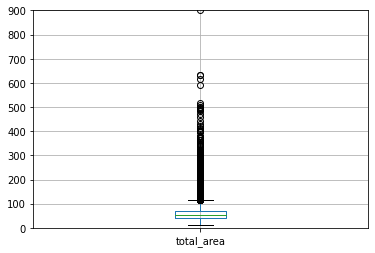

In [36]:
data.boxplot(column='total_area')
plt.ylim(0,900)

**Ограничим максимальную площадь до 250, так как объекты, площадь которых больше встечаются в единичных экземплярах. Такие объекты сильно отличаются от среднего жилья и могут искажать статистику.**

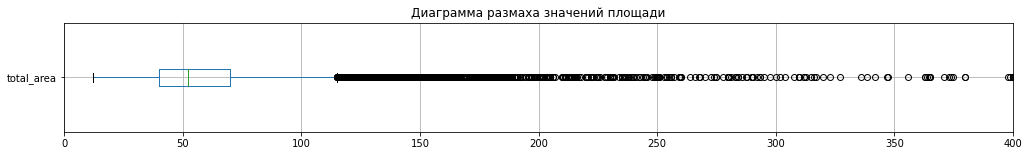

In [37]:
# check
# для примера горизонтальный вид диаграммы размаха

fig, ax = plt.subplots(figsize = (17,2))
ax = data[['total_area']].boxplot(vert = False, ax =ax)
ax.set_title('Диаграмма размаха значений площади')
ax.set_xlim(0, 400);

Text(0, 0.5, 'Количество объектов')

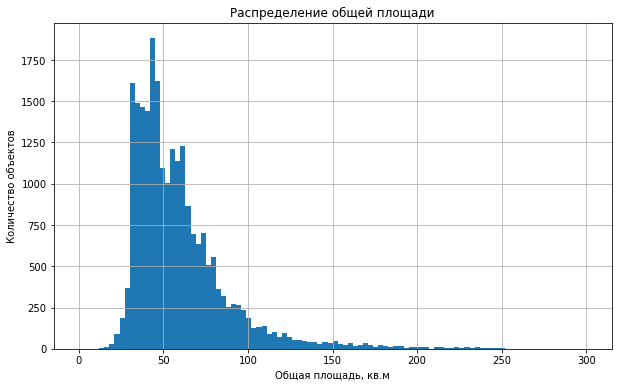

In [38]:
data_filtered = data[(data['total_area'] >= 10) & (data['total_area'] <= 250)]
data_filtered['total_area'].hist(bins=100, range=(0,300), figsize=(10,6))
plt.title('Распределение общей площади')
plt.xlabel('Общая площадь, кв.м')
plt.ylabel('Количество объектов')

In [39]:
print(data_filtered.shape[0])
print(data.shape[0])
data_filtered.shape[0] / data.shape[0]

23378
23489


0.9952743837540977

**Большинство квартир имеет площадь до 100 кв.м. Пик распределения приходится на диапазон от 30 до 50 кв.м, что соответствует средним размерам объектов недвижимости, особенно однокомнатных и двухкомнатных. После 100 кв.м количество квартир резко сокращается, что логично, так как такое жилью реже и намного дороже.**

**Построем гистограмму для столбца `living_area`.**

In [40]:
data['living_area'].describe()

count    23489.000000
mean        34.495392
std         22.175443
min          2.000000
25%         19.000000
50%         30.000000
75%         42.000000
max        409.700000
Name: living_area, dtype: float64

(0.0, 420.0)

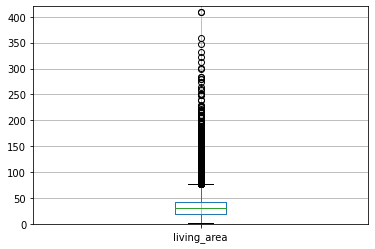

In [41]:
data.boxplot(column='living_area')
plt.ylim(0,420)

**Ограничим максимальную площадь до 200. Проверим, что нет строк, где `living_area` больше `total_area`.**

In [42]:
data_filtered = data_filtered[data_filtered['living_area'] <= 200]
anomalies_living_area = data[data['living_area'] > data['total_area']]
anomalies_living_area

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_square_meter,day_of_the_week,month,year,floor_type,cityCenters_nearest_km


Text(0, 0.5, 'Количество объектов')

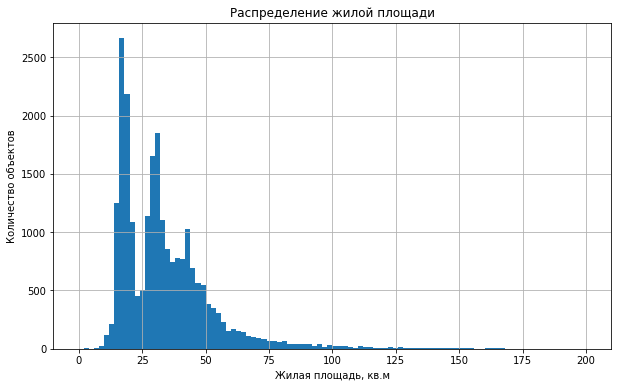

In [43]:
data_filtered['living_area'].hist(bins=100, range=(0,200), figsize=(10,6))
plt.title('Распределение жилой площади')
plt.xlabel('Жилая площадь, кв.м')
plt.ylabel('Количество объектов')

In [44]:
print(data_filtered.shape[0])
print(data.shape[0])
data_filtered.shape[0] / data.shape[0]

23378
23489


0.9952743837540977

**Большинство объектов недвижимости имеют жилую площадь от 10 до 50 кв.м. Это можно считать типичными значениями для жилья в представленной выборке. Интересно, что квартир от 20 до 25 кв.м намного меньше, чем квартир больше или меньше данного размаха.** 

**Построем гистограмму для столбца `kitchen_area`.**

In [45]:
data['kitchen_area'].describe()

count    23489.000000
mean        10.497122
std          5.908110
min          1.300000
25%          7.000000
50%          9.000000
75%         12.000000
max        112.000000
Name: kitchen_area, dtype: float64

(0.0, 120.0)

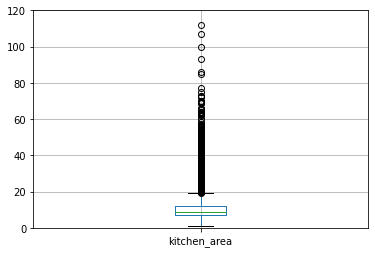

In [46]:
data.boxplot(column='kitchen_area')
plt.ylim(0,120)

**В среднем площадь кухни состовляет около 10 кв.м. Исключим из выборки анаомально большие.**

In [47]:
data_filtered = data_filtered[data_filtered['kitchen_area'] <= 50]
anomalies_kitchen_area = data[data['kitchen_area'] > data['total_area']]
anomalies_kitchen_area

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_square_meter,day_of_the_week,month,year,floor_type,cityCenters_nearest_km


Text(0, 0.5, 'Количество объектов')

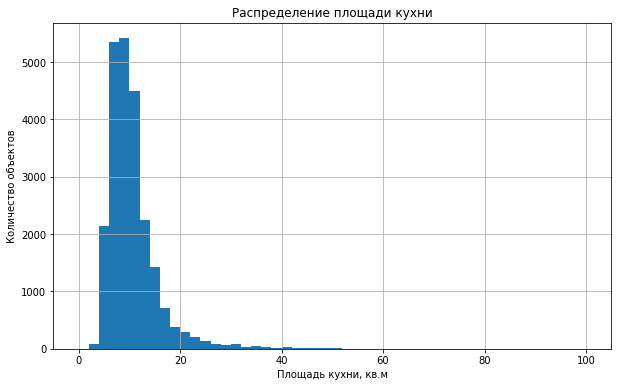

In [48]:
data_filtered['kitchen_area'].hist(bins=50, range=(0,100), figsize=(10,6))
plt.title('Распределение площади кухни')
plt.xlabel('Площадь кухни, кв.м')
plt.ylabel('Количество объектов')

In [49]:
print(data_filtered.shape[0])
print(data.shape[0])
data_filtered.shape[0] / data.shape[0]

23350
23489


0.994082336412789

**В основном площадб кухонь от 5 до 15 кв.м. Наибольшее количество - 8 кв.м.**

**Построем гистограмму для столбца `last_price`.**

In [50]:
data['last_price'].describe()

count    2.348900e+04
mean     6.556661e+06
std      1.091414e+07
min      1.219000e+04
25%      3.450000e+06
50%      4.650000e+06
75%      6.800000e+06
max      7.630000e+08
Name: last_price, dtype: float64

(0.0, 763000000.0)

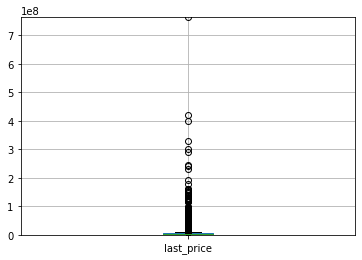

In [51]:
data.boxplot(column='last_price')
plt.ylim(0,7.630000e+08)

**Ограничим до 1e+8.**

Text(0, 0.5, 'Количество объектов')

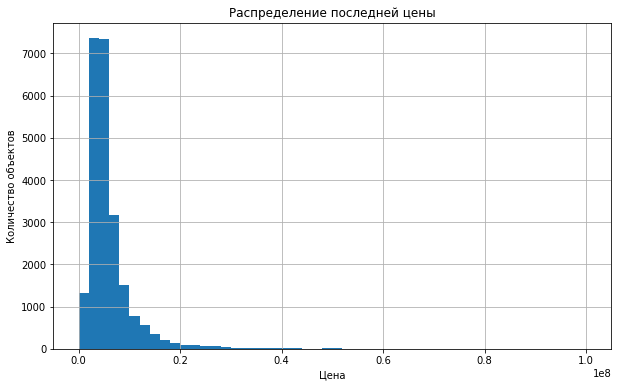

In [52]:
data_filtered = data_filtered[data_filtered['last_price'] <= 1e+08]
data_filtered['last_price'].hist(bins=50, range=(0, 1e+08), figsize=(10,6))
plt.title('Распределение последней цены')
plt.xlabel('Цена')
plt.ylabel('Количество объектов')

In [53]:
print(data_filtered.shape[0])
print(data.shape[0])
data_filtered.shape[0] / data.shape[0]

23339
23489


0.993614032100132

**Построем гистограмму для столбца `rooms`.**

In [54]:
data['rooms'].describe()

count    23489.000000
mean         2.071778
std          1.079696
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

(0.0, 20.0)

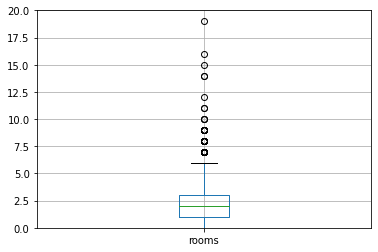

In [55]:
data.boxplot(column='rooms')
plt.ylim(0, 20)

In [56]:
data['rooms'].value_counts()

1     7968
2     7865
3     5766
4     1174
5      325
0      197
6      104
7       59
8       12
9        8
10       3
11       2
14       2
19       1
16       1
12       1
15       1
Name: rooms, dtype: int64

**Ограничим максимальное число комнат до 7.**

Text(0, 0.5, 'Количество объектов')

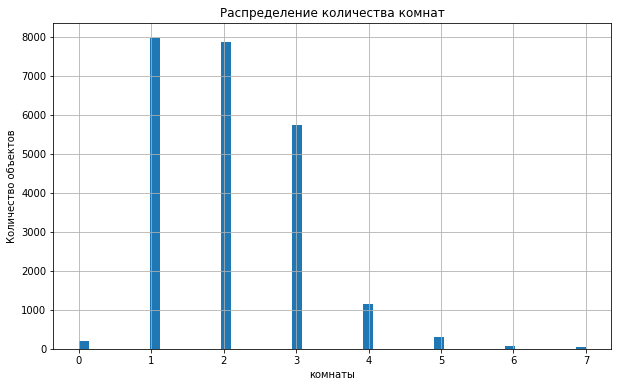

In [57]:
data_filtered = data_filtered[data_filtered['rooms'] <= 7]
data_filtered['rooms'].hist(bins=50, range=(0, 7), figsize=(10,6))
plt.title('Распределение количества комнат')
plt.xlabel('комнаты')
plt.ylabel('Количество объектов')

In [58]:
print(data_filtered.shape[0])
print(data.shape[0])
data_filtered.shape[0] / data.shape[0]

23325
23489


0.9930180084294776

**Больше всего однокомнотных и двухкомнатных квартир. 0 - скорее всего являются квартиры студии.**

**Построем гистограмму для столбца `ceiling_height`.**

In [59]:
data['ceiling_height'].describe()

count    23441.000000
mean         2.724871
std          0.993485
min          1.000000
25%          2.600000
50%          2.650000
75%          2.700000
max        100.000000
Name: ceiling_height, dtype: float64

(0.0, 20.0)

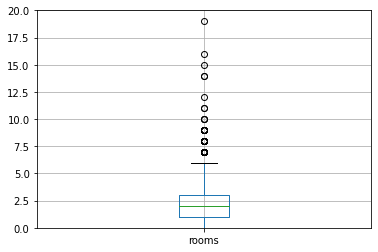

In [60]:
data.boxplot(column='rooms')
plt.ylim(0, 20)

In [61]:
data['ceiling_height'].unique()

array([  2.7 ,   2.65,   3.03,   2.5 ,   2.67,   2.56,   3.05,   2.75,
         2.6 ,   2.9 ,   2.8 ,   2.55,   3.  ,   3.2 ,   2.61,   3.25,
         3.45,   2.77,   2.85,   2.64,   2.57,   4.15,   3.5 ,   3.3 ,
         2.71,   4.  ,   2.47,   2.73,   2.84,   3.1 ,   2.34,   3.4 ,
         3.06,   2.72,   2.54,   2.51,   2.78,   2.76,  25.  ,   2.58,
         3.7 ,   2.52,   5.2 ,   2.87,   2.66,   2.59,   2.  ,   2.45,
         3.6 ,   2.92,   3.11,   3.13,   3.8 ,   3.15,   3.55,   3.16,
         3.62,   3.12,   2.53,   2.74,   2.96,   2.46,   5.3 ,   5.  ,
         2.79,   2.95,    nan,   4.06,   2.94,   3.82,   3.54,   3.53,
         2.83,   4.7 ,   2.4 ,   3.38,   3.01,   5.6 ,   3.65,   3.9 ,
         3.18,   3.35,   2.3 ,   3.57,   2.48,   2.62,   2.82,   3.98,
         2.63,   3.83,   3.52,   3.95,   3.75,   2.88,   3.67,   3.87,
         3.66,   3.85,   3.86,   4.19,   3.24,   4.8 ,   4.5 ,   4.2 ,
         3.36,  32.  ,   3.08,   3.68,   3.07,   3.37,   3.09,   8.  ,
      

**15 метровых потолков не бывает в обчынх квартирах, логично предположить, что при заполнении анкеты о продаже пользователь ошибся и пропустил точку между 1 и 5, высота 1.5м. Максимальное значение 100 метров явно ошибочно и его стоит удалить.**

Text(0, 0.5, 'Количество объектов')

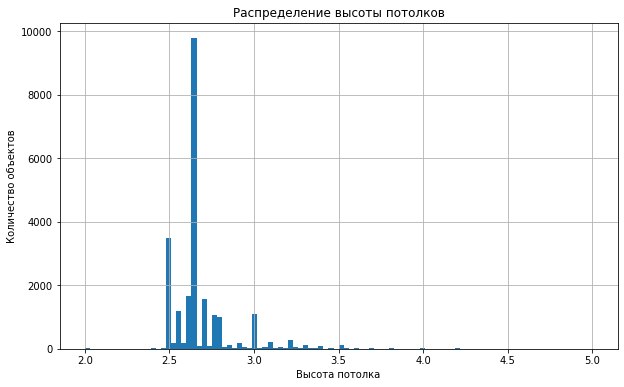

In [62]:
#data_filtered = data[data['ceiling_height'] != 100]
data['ceiling_height'] = data['ceiling_height'].replace({25: 2.5, 27.5: 2.75, 32: 3.2, 14: 1.4, 26: 2.6, 22.6: 2.26, 10.3: 1.03, 24: 2.4, 20: 2})
data_filtered = data_filtered[(data_filtered['ceiling_height'] >= 2) & (data_filtered['ceiling_height'] <= 5)]
data_filtered['ceiling_height'].hist(bins=100, range=(2,5), figsize=(10,6))
plt.title('Распределение высоты потолков')
plt.xlabel('Высота потолка')
plt.ylabel('Количество объектов')

In [63]:
print(data_filtered.shape[0])
print(data.shape[0])
data_filtered.shape[0] / data.shape[0]

23242
23489


0.989484439524884

**В основном высота потолков составляет примерно 2.744 м. Квартиры с потолками до 2.5 м и выше 3 м пракктически не встречаются.**

In [64]:
#data['ceiling_height'] = data.groupby('locality_name')['ceiling_height'].apply(lambda x: x.fillna(x.median()))

medians = data.groupby('locality_name')['ceiling_height'].median()  
overall_median = medians.mean()  

print(f"Среднее медианных значений по всем группам: {overall_median}")

Среднее медианных значений по всем группам: 2.743733552631579


**Построем гистограмму для столбца `floor_type`.**

In [65]:
data['floor_type'].value_counts()

другой       17272
последний     3339
первый        2878
Name: floor_type, dtype: int64

Text(0, 0.5, 'Количество объектов')

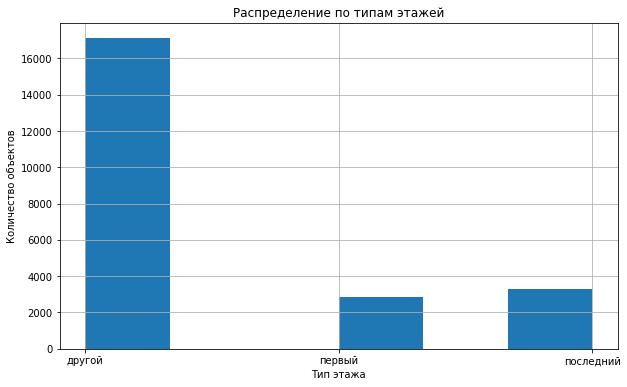

In [66]:
data_filtered['floor_type'].hist(bins=6, figsize=(10,6))
plt.title('Распределение по типам этажей')
plt.xlabel('Тип этажа')
plt.ylabel('Количество объектов')

**Логично, что большинство людей не живот на певром или последнем этаже, гистограмма это тоже подтверждает.**

**Построем гистограмму для столбца `floors_total`.**

In [67]:
data['floors_total'].describe()

count    23489.000000
mean        10.706416
std          6.594973
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

(0.0, 60.0)

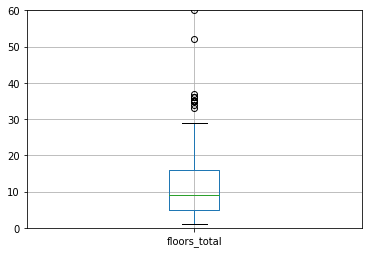

In [68]:
data.boxplot(column='floors_total')
plt.ylim(0, 60)

**Удалим слишком большие и редкие значения.**

Text(0, 0.5, 'Количество объектов')

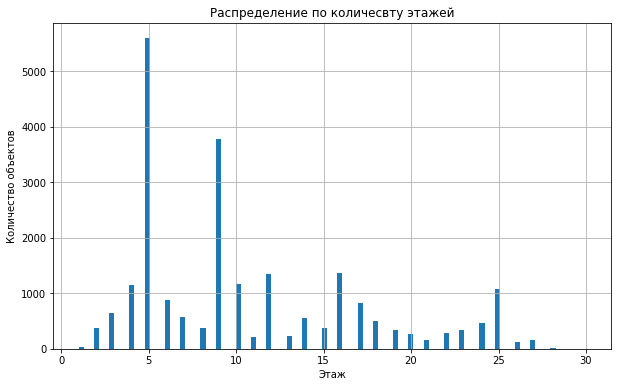

In [69]:
data_filtered = data_filtered[data_filtered['floors_total'] <= 29]
data_filtered['floors_total'].hist(bins=100, range=(1,30), figsize=(10,6))
plt.title('Распределение по количесвту этажей')
plt.xlabel('Этаж')
plt.ylabel('Количество объектов')

In [70]:
print(data_filtered.shape[0])
print(data.shape[0])
data_filtered.shape[0] / data.shape[0]

23212
23489


0.9882072459449104

**Большинство зданий имеют 5 или 9 этажей.**

**Построем гистограмму для столбца `cityCenters_nearest`.**

In [71]:
data['cityCenters_nearest'].describe()

count    18119.000000
mean     14194.062752
std       8609.417933
min        181.000000
25%       9238.000000
50%      13101.000000
75%      16293.000000
max      65968.000000
Name: cityCenters_nearest, dtype: float64

(0.0, 65968.0)

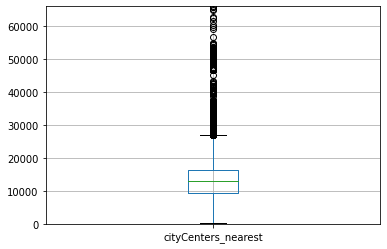

In [72]:
data.boxplot(column='cityCenters_nearest')
plt.ylim(0, 65968)

#### check nan

In [73]:
# check
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23489 entries, 0 to 23698
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   total_images            23489 non-null  int64         
 1   last_price              23489 non-null  float64       
 2   total_area              23489 non-null  float64       
 3   first_day_exposition    23489 non-null  datetime64[ns]
 4   rooms                   23489 non-null  int64         
 5   ceiling_height          23441 non-null  float64       
 6   floors_total            23489 non-null  int64         
 7   living_area             23489 non-null  float64       
 8   floor                   23489 non-null  int64         
 9   is_apartment            23489 non-null  bool          
 10  studio                  23489 non-null  bool          
 11  open_plan               23489 non-null  bool          
 12  kitchen_area            23489 non-null  float6

Text(0, 0.5, 'Количество объектов')

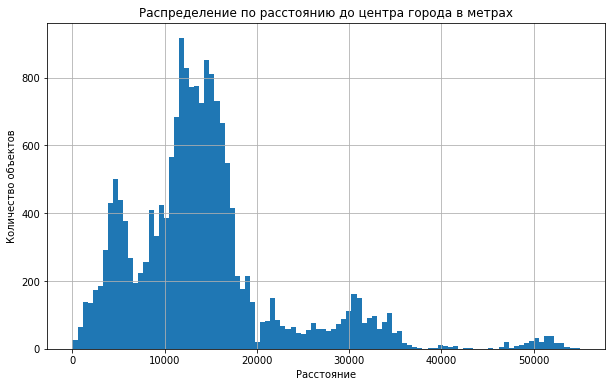

In [74]:
data_filtered = data_filtered[(data_filtered['cityCenters_nearest'] <= 55000) | (data_filtered['cityCenters_nearest'].isnull())]
data_filtered['cityCenters_nearest'].hist(bins=100, range=(1, 55000), figsize=(10,6))
plt.title('Распределение по расстоянию до центра города в метрах')
plt.xlabel('Расстояние')
plt.ylabel('Количество объектов')

In [75]:
print(data_filtered.shape[0])
print(data.shape[0])
data_filtered.shape[0] / data.shape[0]

23200
23489


0.987696368512921

**Основная масса объектов недвижимости располагается до 40000 метров до центра города. Наиболее часто встречаются квартиры расположенные на расстоянии 5000 м, а также от 10000 до 20000.**

In [76]:
# check
data.shape[0]

23489

**Построем гистограмму для столбца `parks_nearest`.**

In [77]:
data['parks_nearest'].describe()

count    8055.000000
mean      490.653880
std       341.737389
min         1.000000
25%       288.000000
50%       455.000000
75%       612.000000
max      3190.000000
Name: parks_nearest, dtype: float64

(0.0, 3190.0)

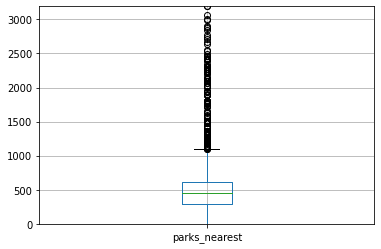

In [78]:
data.boxplot(column='parks_nearest')
plt.ylim(0, 3190)

Text(0, 0.5, 'Количество объектов')

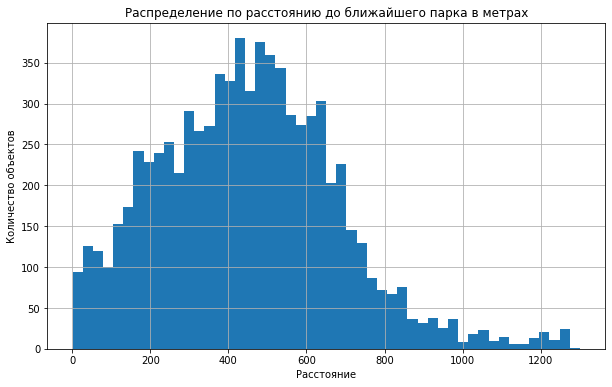

In [79]:
#data_filtered = data[data['cityCenters_nearest'] <= 1300]

data_filtered['parks_nearest'].hist(bins=50, range=(1, 1300), figsize=(10,6))
plt.title('Распределение по расстоянию до ближайшего парка в метрах')
plt.xlabel('Расстояние')
plt.ylabel('Количество объектов')

In [80]:
print(data_filtered.shape[0])
print(data.shape[0])
data_filtered.shape[0] / data.shape[0]

23200
23489


0.987696368512921

**Большинство объектов недвижимости расположены на расстоянии не более чем 700 м до ближайшего парка. Однако следует отметить, что значительное количество объявлений содержит пропущенные данные в этой колонке.**

#### check gap

In [81]:
# check
data_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23200 entries, 0 to 23698
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   total_images            23200 non-null  int64         
 1   last_price              23200 non-null  float64       
 2   total_area              23200 non-null  float64       
 3   first_day_exposition    23200 non-null  datetime64[ns]
 4   rooms                   23200 non-null  int64         
 5   ceiling_height          23200 non-null  float64       
 6   floors_total            23200 non-null  int64         
 7   living_area             23200 non-null  float64       
 8   floor                   23200 non-null  int64         
 9   is_apartment            23200 non-null  bool          
 10  studio                  23200 non-null  bool          
 11  open_plan               23200 non-null  bool          
 12  kitchen_area            23200 non-null  float6

In [82]:
# check

# Показатели о кол-ве объявлений в датасете, минимальных и максимальных значениях 
# в выбранных параметрах о продаже квартир
# сырые данные

(
    data_filtered[['rooms', 'total_area', 'ceiling_height', 'days_exposition', 'last_price', 'living_area',  'kitchen_area',
          'floor', 'floors_total']]
    .apply (['count', 'min', 'max'])   
    .style.format("{:,.2f}")
)

,rooms,total_area,ceiling_height,days_exposition,last_price,living_area,kitchen_area,floor,floors_total
count,"23,200.00","23,200.00","23,200.00","20,106.00","23,200.00","23,200.00","23,200.00","23,200.00","23,200.00"
min,0.00,12.00,2.00,1.00,"12,190.00",2.00,1.30,1.00,1.00
max,7.00,250.00,5.00,"1,580.00","98,000,000.00",184.00,50.00,27.00,29.00


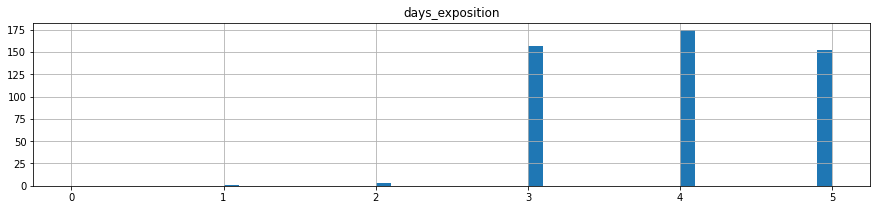

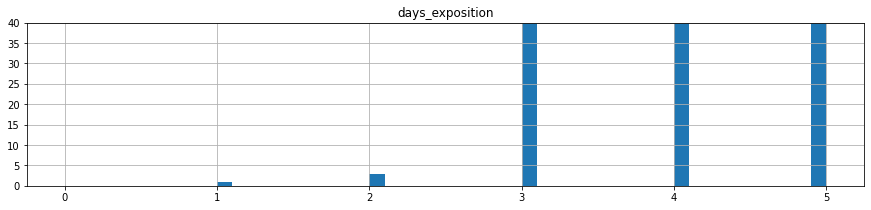

In [83]:
# check
data.hist(column = 'days_exposition', bins = 50, figsize = (15,3), range = (0,5));

data.hist(column = 'days_exposition', bins = 50, figsize = (15,3), range = (0,5))
plt.ylim(0, 40);

In [84]:
# check

# Показатели о кол-ве объявлений в датасете, минимальных и максимальных значениях 
# в выбранных параметрах о продаже квартир
# сырые данные

(
    data_filtered[['rooms', 'total_area', 'ceiling_height', 'days_exposition', 'last_price', 'living_area',  'kitchen_area',
          'floor', 'floors_total']]
    .apply (['count', 'min', 'max', 'median'])   
    .style.format("{:,.2f}")
)

,rooms,total_area,ceiling_height,days_exposition,last_price,living_area,kitchen_area,floor,floors_total
count,"23,200.00","23,200.00","23,200.00","20,106.00","23,200.00","23,200.00","23,200.00","23,200.00","23,200.00"
min,0.00,12.00,2.00,1.00,"12,190.00",2.00,1.30,1.00,1.00
max,7.00,250.00,5.00,"1,580.00","98,000,000.00",184.00,50.00,27.00,29.00
median,2.00,52.00,2.65,95.00,"4,620,000.00",30.00,9.00,4.00,9.00


In [85]:
# check

try:
    df_check = pd.read_csv('https://code.s3.yandex.net/datasets/real_estate_data.csv', sep='\t')
# если не получилось прочитать файл из локальной папки, то загружаем данные из сети
except:
    df_check = pd.read_csv('real_estate_data.csv', sep='\t')

In [86]:
# check
df_check.rooms.value_counts().to_frame()

,rooms
1,8047
2,7940
3,5814
4,1180
5,326
0,197
6,105
7,59
8,12
9,8


In [87]:
# check
import matplotlib.pyplot as plt

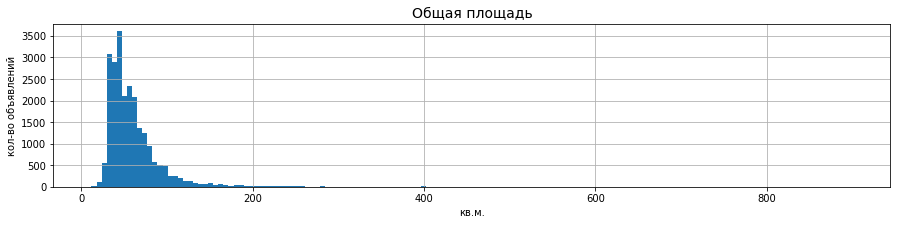

In [88]:
# check
df_check.total_area.hist(bins = 150, figsize = (15,3))
plt.title('Общая площадь', fontsize=14)
plt.xlabel('кв.м.')
plt.ylabel('кол-во объявлений');

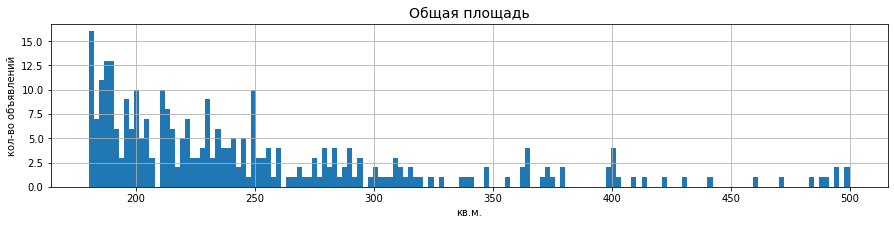

In [89]:
# check
df_check.total_area.hist(bins = 150, figsize = (15,3), range = (180,500))
plt.title('Общая площадь', fontsize=14)
plt.xlabel('кв.м.')
plt.ylabel('кол-во объявлений');

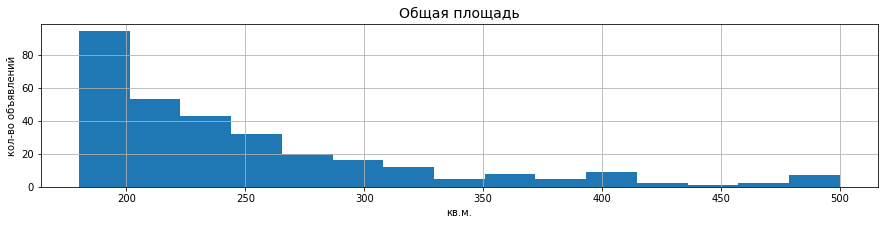

In [90]:
# check
df_check.total_area.hist(bins = 15, figsize = (15,3), range = (180,500))
plt.title('Общая площадь', fontsize=14)
plt.xlabel('кв.м.')
plt.ylabel('кол-во объявлений');

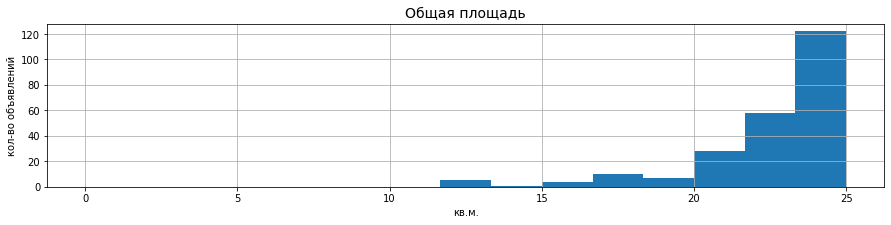

In [91]:
# check
df_check.total_area.hist(bins = 15, figsize = (15,3), range = (0,25))
plt.title('Общая площадь', fontsize=14)
plt.xlabel('кв.м.')
plt.ylabel('кол-во объявлений');

In [92]:
print(data_filtered.shape[0])
print(data.shape[0])
data_filtered.shape[0] / data.shape[0]

23200
23489


0.987696368512921

In [93]:
# check

# Значения параметров объектов недвижимости на разных квантилях

(
    data[['rooms', 'total_area', 'ceiling_height', 'days_exposition', 'last_price', 'living_area',  
        'kitchen_area', 'floor',   'floors_total']]
    .quantile([0.0012, 0.01, .5, .99, .9988]) # выбираем размах в 0,9976 квантилей 
    .style.format("{:,.2f}")
)

,rooms,total_area,ceiling_height,days_exposition,last_price,living_area,kitchen_area,floor,floors_total
0.0012,0.00,20.00,2.40,3.00,"560,928.00",9.02,3.19,1.00,2.00
0.01,1.00,25.19,2.50,4.00,"1,008,800.00",13.00,4.50,1.00,2.00
0.5,2.00,52.00,2.65,95.00,"4,650,000.00",30.00,9.00,4.00,9.00
0.99,5.00,197.91,3.60,"1,068.10","36,000,000.00",121.07,35.11,23.00,26.00
0.9988,8.00,380.00,4.50,"1,370.93","124,903,488.00",225.18,62.81,26.00,35.00


#### Изучение того, за сколько дней продаются квартиры

**Теперь изучим столбец `days_exposition`**

In [94]:
data_filtered['days_exposition'].describe()

count    20106.000000
mean       179.630757
std        218.756652
min          1.000000
25%         45.000000
50%         95.000000
75%        229.000000
max       1580.000000
Name: days_exposition, dtype: float64

<AxesSubplot:>

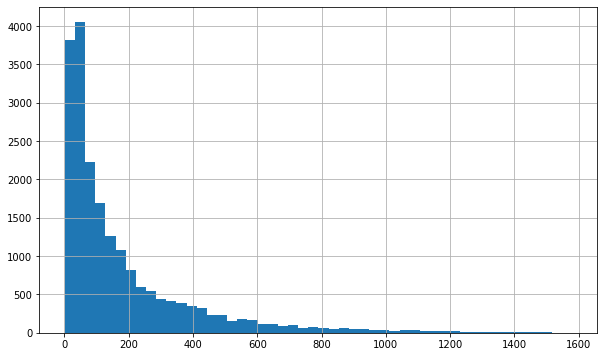

In [95]:
data_filtered['days_exposition'].hist(bins=50, range=(1, 1580), figsize=(10,6))

In [96]:
data_filtered['days_exposition'].mean()

179.6307569879638

In [97]:
data_filtered['days_exposition'].median()

95.0

**Количестов дней с момента публикации экспоненциально уменьшается. Согласно медиане в большинстве квартиры продаются до 95 дней. 95 дней можно считать обычным временем продажи. Все продажи до 95 дней можно считать быстрыми, после 180 дней - долгими.**

In [98]:
avg_days_exposition = data_filtered.groupby('year')['days_exposition'].mean().reset_index()
avg_days_exposition.columns = ['year', 'avg_days_exposition']

avg_days_exposition['avg_sales_speed'] = 1 / avg_days_exposition['avg_days_exposition']

avg_days_exposition

,year,avg_days_exposition,avg_sales_speed
0,2014,913.725664,0.001094
1,2015,652.791394,0.001532
2,2016,320.061556,0.003124
3,2017,158.347328,0.006315
4,2018,94.057599,0.010632
5,2019,30.987770,0.032271


In [99]:
mode = data_filtered['days_exposition'].mode()
mode

0    45.0
dtype: float64

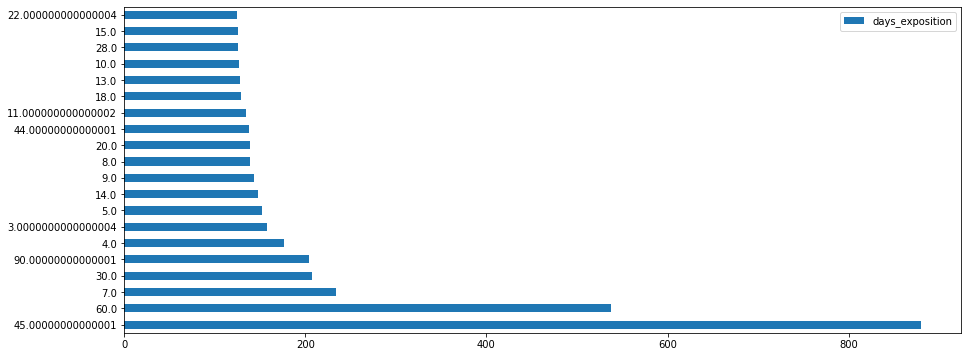

In [100]:
# check
# Моды на сырых данных

try:
    df_check = pd.read_csv('/datasets/real_estate_data.csv', sep = '\t')
except:
    df_check = pd.read_csv('real_estate_data.csv', sep='\t')
    
df_check['days_exposition'].value_counts().to_frame().head(20).plot(kind = 'barh', figsize = (15,6), rot = 0);

In [101]:
data['days_exposition'].quantile([0.25, 0.5, 0.75])

0.25     45.0
0.50     95.0
0.75    231.0
Name: days_exposition, dtype: float64

#### Определение основных факторов от которых зависит цена

**Определим основные факторы от которых зависит цена продажи, рассмотрим зависимость стоимости от общей площади; жилой площади; площади кухни; количества комнат; этажа, на котором расположена квартира (первый, последний, другой); даты размещения (день недели, месяц, год).**

Коэффициент корреляции между общей площадью и ценой: 0.74


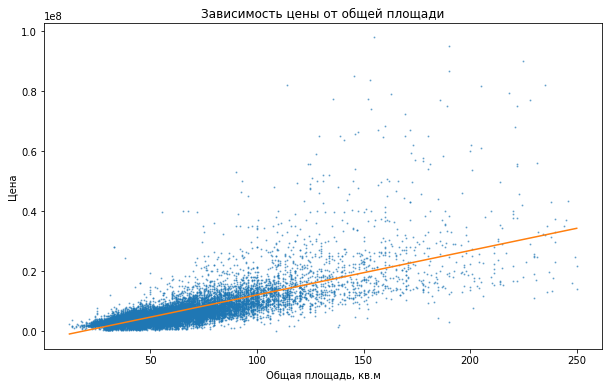

In [102]:
#area_price_pivot = data_filtered.pivot_table(index='total_area', values='last_price', aggfunc='median')
#plt.figure(figsize=(10, 6))
#plt.plot(area_price_pivot.index, area_price_pivot['last_price'])
#plt.title('Зависимость цены от общей площади')
#plt.xlabel('Общая площадь, кв.м')
#plt.ylabel('Медианная цена, млн руб')
#plt.show()

plt.figure(figsize=(10, 6))
plt.plot(data_filtered['total_area'], data_filtered['last_price'], 'o',
         alpha=0.5, markersize=1)
plt.xlabel('Общая площадь, кв.м')
plt.ylabel('Цена')
plt.title('Зависимость цены от общей площади');


corr_total_1 = data_filtered['total_area'].corr(data_filtered['last_price'])
print(f"Коэффициент корреляции между общей площадью и ценой: {corr_total_1:.2f}")

res1 = linregress(data_filtered['total_area'], data_filtered['last_price'])
res1._asdict()
fx_1 = np.array([data_filtered['total_area'].min(), data_filtered['total_area'].max()])
fy_1 = res1.intercept + res1.slope * fx_1
plt.plot(fx_1, fy_1, '-');

Коэффициент корреляции между площадью кухни и ценой: 0.58


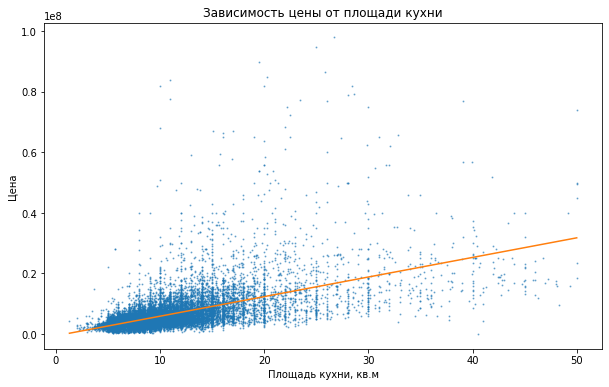

In [103]:
#kitchen_area_price_pivot = data_filtered.pivot_table(index='kitchen_area', values='last_price', aggfunc='median')
#plt.figure(figsize=(10, 6))
#plt.plot(kitchen_area_price_pivot.index, kitchen_area_price_pivot['last_price'])
#plt.title('Зависимость цены от площади кухни')
#plt.xlabel('Площадь кухни, кв.м')
#plt.ylabel('Медианная цена, млн руб')
#plt.show()

plt.figure(figsize=(10, 6))
plt.plot(data_filtered['kitchen_area'], data_filtered['last_price'], 'o',
         alpha=0.5, markersize=1)
plt.xlabel('Площадь кухни, кв.м')
plt.ylabel('Цена')
plt.title('Зависимость цены от площади кухни');


corr_total_2 = data_filtered['kitchen_area'].corr(data_filtered['last_price'])
print(f"Коэффициент корреляции между площадью кухни и ценой: {corr_total_2:.2f}")

res2 = linregress(data_filtered['kitchen_area'], data_filtered['last_price'])
res2._asdict()
fx_2 = np.array([data_filtered['kitchen_area'].min(), data_filtered['kitchen_area'].max()])
fy_2 = res2.intercept + res2.slope * fx_2
plt.plot(fx_2, fy_2, '-');

Коэффициент корреляции между площадью кухни и ценой: 0.66


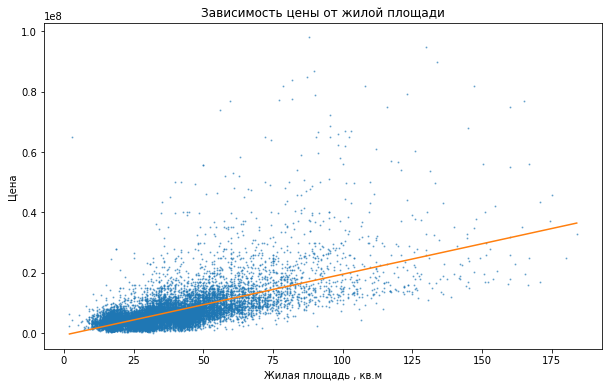

In [104]:
#living_area_price_pivot = data_filtered.pivot_table(index='living_area', values='last_price', aggfunc='median')
#plt.figure(figsize=(10, 6))
#plt.plot(living_area_price_pivot.index, living_area_price_pivot['last_price'])
#plt.title('Зависимость цены от жилой площади')
#plt.xlabel('Жилая площадь , кв.м')
#plt.ylabel('Медианная цена, млн руб')
#plt.show()

plt.figure(figsize=(10, 6))
plt.plot(data_filtered['living_area'], data_filtered['last_price'], 'o',
         alpha=0.5, markersize=1)
plt.xlabel('Жилая площадь , кв.м')
plt.ylabel('Цена')
plt.title('Зависимость цены от жилой площади');


corr_total_3 = data_filtered['living_area'].corr(data_filtered['last_price'])
print(f"Коэффициент корреляции между площадью кухни и ценой: {corr_total_3:.2f}")

res3 = linregress(data_filtered['living_area'], data_filtered['last_price'])
res3._asdict()
fx_3 = np.array([data_filtered['living_area'].min(), data_filtered['living_area'].max()])
fy_3 = res3.intercept + res3.slope * fx_3
plt.plot(fx_3, fy_3, '-');

**Для общей площади и цены коэффициент корреляции равен 0.74, что говорит о достаточно сильной положительной связи между ними. Это означает, что увеличение общей площади квартиры, как правило, приводит к увеличению её стоимости.**

**Для площади кухни и цены коэффициент корреляции равен 0.58. Здесь наблюдается умеренная положительная зависимость. Это значит, что увеличение площади кухни также связано с ростом цены, однако связь менее выражена, чем для общей площади квартиры.**

**Для жилой площади и цены коэффициент корреляции равен 0.66. Как и в случае с общей площадью, увеличение жилой площади приводит к увеличению цены, хотя влияние несколько слабее.**

**В целом, все три графика подтверждают, что размеры квартиры (общая, жилая и площадь кухни) оказывают значительное влияние на её стоимость.**

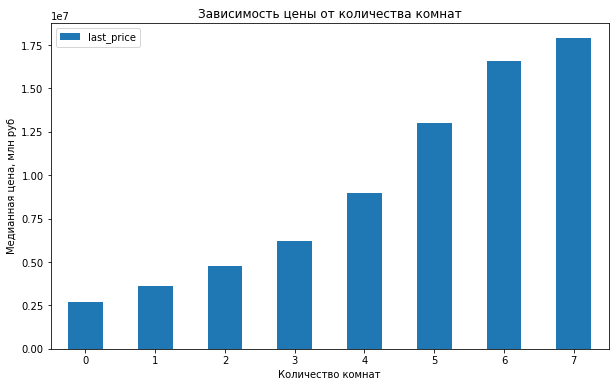

Коэффициент корреляции между количеством комнат и ценой: 0.45


In [105]:
rooms_price_pivot = data_filtered.pivot_table(index='rooms', values='last_price', aggfunc='median')
rooms_price_pivot.plot(kind='bar', figsize=(10, 6))
plt.title('Зависимость цены от количества комнат')
plt.xlabel('Количество комнат')
plt.ylabel('Медианная цена, млн руб')
plt.xticks(rotation=0)
plt.show()

corr_total_4 = data_filtered['rooms'].corr(data_filtered['last_price'])
print(f"Коэффициент корреляции между количеством комнат и ценой: {corr_total_4:.2f}")

**С увеличением количества комнта цена на квартиры растет. Однако корреляция слабая, но есть.**

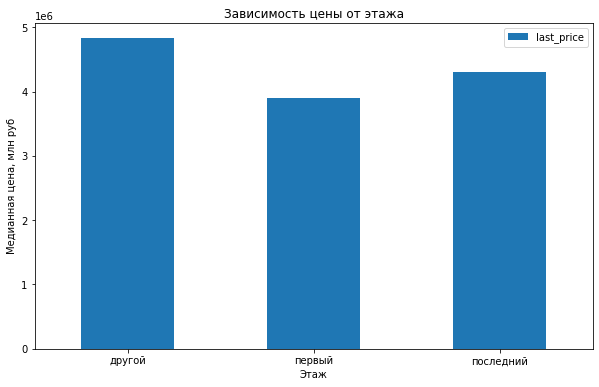

In [106]:
floor_type_price_pivot = data_filtered.pivot_table(index='floor_type', values='last_price', aggfunc='median')
floor_type_price_pivot.plot(kind='bar', figsize=(10, 6))
plt.title('Зависимость цены от этажа')
plt.xlabel('Этаж')
plt.ylabel('Медианная цена, млн руб')
plt.xticks(rotation=0)
plt.show()

**Люди меньше всего предпочитают квартиры на первом и последних этажах. Квартиры, расположенные на первом этаже, немного дешевле квартир, расположенных на последнем. Квартиры на последнем, в свою очередь, дешевле, чем на остальных этажах.**

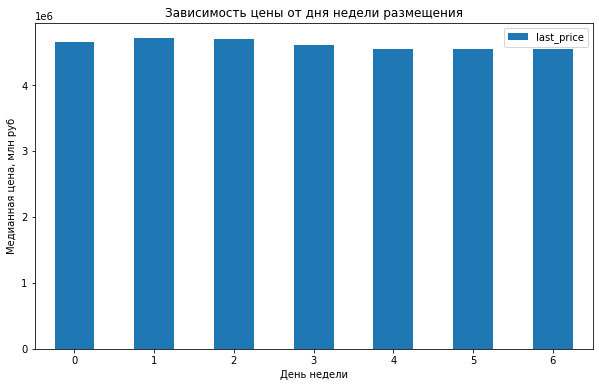

Коэффициент корреляции между днем недели размещения и ценой: -0.01


In [107]:
day_price_pivot = data_filtered.pivot_table(index='day_of_the_week', values='last_price', aggfunc='median')
month_price_pivot = data_filtered.pivot_table(index='month', values='last_price', aggfunc='median')
year_price_pivot = data_filtered.pivot_table(index='year', values='last_price', aggfunc='median')

day_price_pivot.plot(kind='bar', figsize=(10, 6))
plt.title('Зависимость цены от дня недели размещения')
plt.xlabel('День недели')
plt.ylabel('Медианная цена, млн руб')
plt.xticks(rotation=0)
plt.show()

corr_total_5 = data_filtered['day_of_the_week'].corr(data_filtered['last_price'])
print(f"Коэффициент корреляции между днем недели размещения и ценой: {corr_total_5:.2f}")

**На графике видно, что цена никак не зависит от дня недели размещения объявления.**

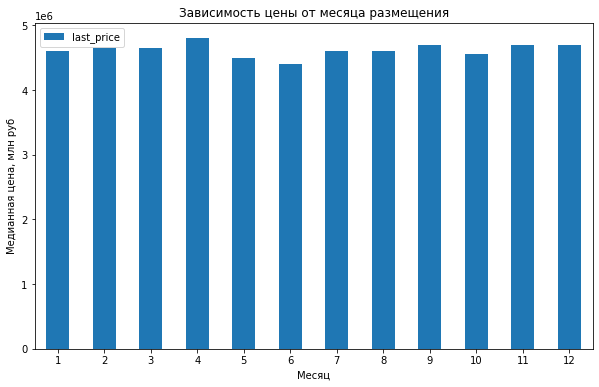

Коэффициент корреляции между месяцем размещения и ценой: 0.01


In [108]:
month_price_pivot.plot(kind='bar', figsize=(10, 6))
plt.title('Зависимость цены от месяца размещения')
plt.xlabel('Месяц')
plt.ylabel('Медианная цена, млн руб')
plt.xticks(rotation=0)
plt.show()

corr_total_6 = data_filtered['month'].corr(data_filtered['last_price'])
print(f"Коэффициент корреляции между месяцем размещения и ценой: {corr_total_6:.2f}")

**Цены на квартиры не зависят от месяца размещения.** 

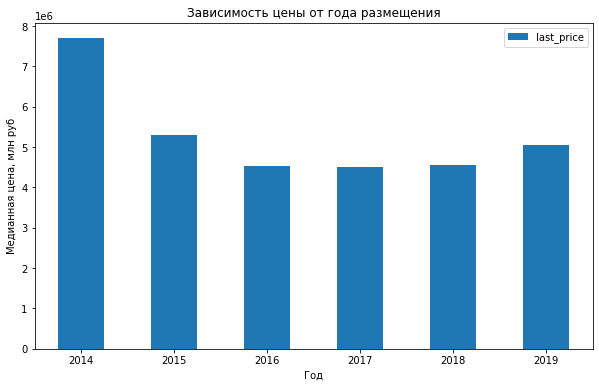

Коэффициент корреляции между годом размещения и ценой: -0.05


In [109]:
year_price_pivot.plot(kind='bar', figsize=(10, 6))
plt.title('Зависимость цены от года размещения')
plt.xlabel('Год')
plt.ylabel('Медианная цена, млн руб')
plt.xticks(rotation=0)
plt.show()
corr_total_7 = data_filtered['year'].corr(data_filtered['last_price'])
print(f"Коэффициент корреляции между годом размещения и ценой: {corr_total_7:.2f}")

**На графике видно, что медианные цены были самыми высокими в 2014 году, затем они снижались до 2017 года и оставались примерно на одном уровне с небольшими колебаниями в 2018-2019 годах. Коэффициент корреляции между годом размещения и ценой равен -0.05, что указывает на очень слабую отрицательную корреляцию. Это говорит о том, что год размещения объявления практически не влияет на цену.**

**Несмотря на значительное изменение цен в 2014 году, в дальнейшем цены стабилизировались, и зависимость цены от года стала слабой. Таким образом, можно сделать вывод, что год размещения имеет незначительное влияние на медианную цену недвижимости, за исключением резкого скачка в 2014 году.**


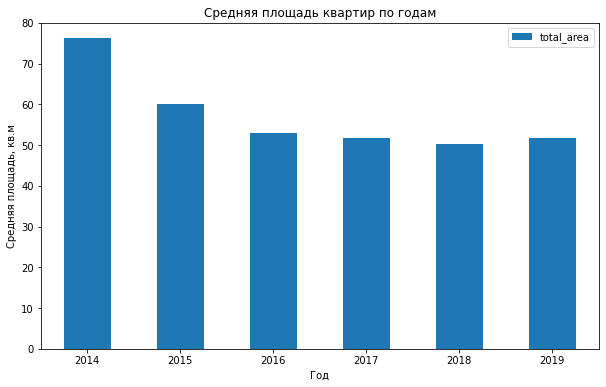

In [110]:
year_area_pivot = data_filtered.pivot_table(index='year', values='total_area', aggfunc='median')
year_area_pivot.plot(kind='bar', figsize=(10, 6))
plt.title('Средняя площадь квартир по годам')
plt.xlabel('Год')
plt.ylabel('Средняя площадь, кв.м')
plt.xticks(rotation=0)
plt.show()

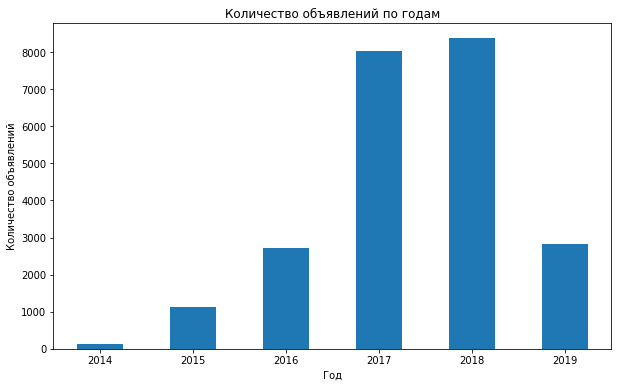

In [111]:
year_counts = data_filtered['year'].value_counts().sort_index()
year_counts.plot(kind='bar', figsize=(10, 6))
plt.title('Количество объявлений по годам')
plt.xlabel('Год')
plt.ylabel('Количество объявлений')
plt.xticks(rotation=0)
plt.show()

In [112]:
summary_pivot = data_filtered.pivot_table(index='year', values=['total_area', 'last_price'], aggfunc={'total_area': 'median', 'last_price': 'median'})
summary_pivot['count'] = data_filtered.groupby('year').size()
summary_pivot

,last_price,total_area,count
year,,,
2014,7700000.0,76.260,131
2015,5300000.0,60.000,1138
2016,4530000.0,53.000,2711
2017,4500000.0,51.715,8026
2018,4550000.0,50.300,8374
2019,5050000.0,51.850,2820


#### Определение топ-10 населенных пунктов с наибольшим количеством объявлений.

**Посчитаем среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений.**

In [113]:
square_price_pivot_table = data_filtered.groupby('locality_name').agg(
    number_of_listings=('last_price', 'count'), 
    avg_price_per_square_meter=('price_per_square_meter', 'mean')
).reset_index()

top_10_localities = square_price_pivot_table.nlargest(10, 'number_of_listings').round(2)


highest_price_locality = top_10_localities.loc[top_10_localities['avg_price_per_square_meter'].idxmax()]
lowest_price_locality = top_10_localities.loc[top_10_localities['avg_price_per_square_meter'].idxmin()]

print(top_10_localities)
print()
print(highest_price_locality)
print()
print(lowest_price_locality)

       locality_name  number_of_listings  avg_price_per_square_meter
221  санкт-петербург               15463                   113186.68
146           мурино                 578                    86152.76
107          кудрово                 469                    95351.73
295           шушары                 439                    78687.95
35        всеволожск                 390                    68754.17
200           пушкин                 362                   103010.03
90           колпино                 337                    75333.30
169        парголово                 326                    90260.06
43           гатчина                 277                    68949.13
36            выборг                 215                    58505.49

locality_name                 санкт-петербург
number_of_listings                      15463
avg_price_per_square_meter          113186.68
Name: 221, dtype: object

locality_name                   выборг
number_of_listings                 21

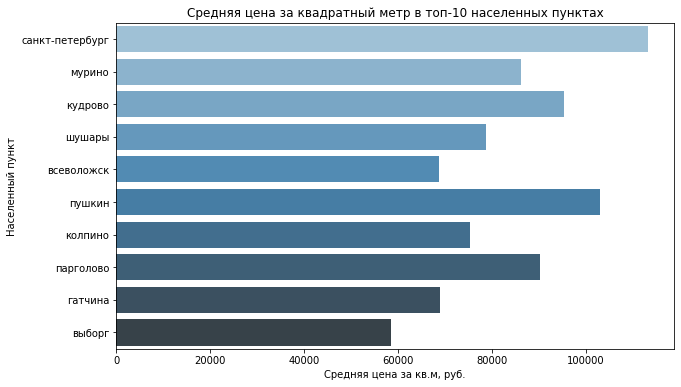

In [114]:
plt.figure(figsize=(10, 6))
sns.barplot(
    x='avg_price_per_square_meter', 
    y='locality_name', 
    data=top_10_localities, 
    palette='Blues_d'
)
plt.title('Средняя цена за квадратный метр в топ-10 населенных пунктах')
plt.xlabel('Средняя цена за кв.м, руб.')
plt.ylabel('Населенный пункт')
plt.show()

#### Определение средней стоимости квартир в Санкт-Петербурге в зависимости от удаления от центра.

**Вычислим среднюю стоимость квартир на разном удалении от центра Санкт-Петербурга.**

    cityCenters_nearest_km   avg_price
0                      0.0  13700000.0
1                      1.0  10835000.0
2                      2.0   9800000.0
3                      3.0   8300000.0
4                      4.0   9000000.0
5                      5.0   9100000.0
6                      6.0   8575000.0
7                      7.0   7600000.0
8                      8.0   7400000.0
9                      9.0   5300000.0
10                    10.0   5000000.0
11                    11.0   5072500.0
12                    12.0   4950000.0
13                    13.0   5200000.0
14                    14.0   4850000.0
15                    15.0   4900000.0
16                    16.0   4750000.0
17                    17.0   4577080.0
18                    18.0   4300000.0
19                    19.0   4500000.0
20                    20.0   4700000.0
21                    21.0   5210000.0
22                    22.0   4925000.0
23                    23.0   4500000.0
24                    24.

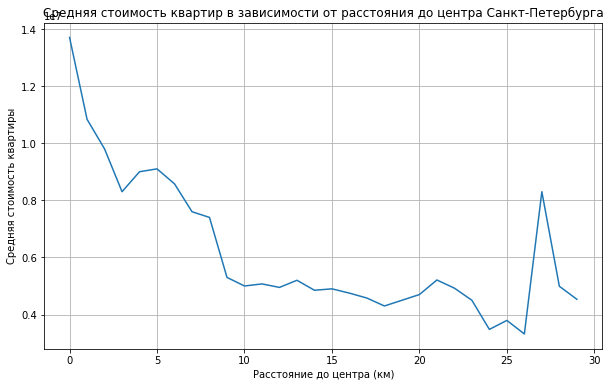

In [115]:
saint_petersburg = data_filtered[data_filtered['locality_name'] == 'санкт-петербург']
price_by_distance = saint_petersburg.groupby('cityCenters_nearest_km')['last_price'].median().reset_index()
price_by_distance.rename(columns={'last_price': 'avg_price'}, inplace=True)
print(price_by_distance)

plt.figure(figsize=(10, 6))
plt.plot(price_by_distance['cityCenters_nearest_km'], price_by_distance['avg_price'])
plt.title('Средняя стоимость квартир в зависимости от расстояния до центра Санкт-Петербурга')
plt.xlabel('Расстояние до центра (км)')
plt.ylabel('Средняя стоимость квартиры')
plt.grid(True)
plt.show()

In [116]:
saint_petersburg['cityCenters_nearest_km'].describe()

count    15405.000000
mean        11.645050
std          4.825164
min          0.000000
25%          8.000000
50%         12.000000
75%         15.000000
max         29.000000
Name: cityCenters_nearest_km, dtype: float64

**По графику заметно, что стоимость квартир активно снижается до 4 км от центра. От 4 до 6 наблюдается небольшой рост цены (может быть связан с локальными факторами, такими как престижные районы, находящиеся на небольшом удалении от центра), после же идет плавный спад стоимости. Наибольшее количество квартир находится в пределах 15 км.**

In [117]:
saint_petersburg_27 = saint_petersburg[saint_petersburg['cityCenters_nearest_km'] == 27]
print(saint_petersburg_27)

      total_images  last_price  total_area first_day_exposition  rooms  \
748             13  14350000.0        74.0           2017-11-28      2   
5961             6   2250000.0        32.0           2018-02-27      1   

      ceiling_height  floors_total  living_area  floor  is_apartment  ...  \
748             3.13             5         30.0      3         False  ...   
5961            2.65             2         16.5      2         False  ...   

      parks_nearest  ponds_around3000  ponds_nearest  days_exposition  \
748          1496.0               0.0            NaN            128.0   
5961            NaN               0.0            NaN            178.0   

     price_per_square_meter  day_of_the_week  month  year  floor_type  \
748               193918.92                1     11  2017      другой   
5961               70312.50                1      2  2018   последний   

      cityCenters_nearest_km  
748                     27.0  
5961                    27.0  

[2 rows x 2

In [118]:
floor_by_distance = saint_petersburg.groupby(['cityCenters_nearest_km', 'floor_type']).size().unstack(fill_value=0)
floor_by_distance_percentage = (floor_by_distance.div(floor_by_distance.sum(axis=1), axis=0) * 100).round(2)
floor_by_distance_percentage

floor_type,другой,первый,последний
cityCenters_nearest_km,,,
0.0,70.83,12.50,16.67
1.0,63.64,13.07,23.30
2.0,59.39,15.36,25.26
3.0,61.83,15.68,22.49
4.0,71.56,11.83,16.62
5.0,76.05,8.97,14.98
6.0,74.49,10.54,14.97
7.0,78.00,7.82,14.18
8.0,80.00,8.89,11.11


### Напишите общий вывод

**В результате данного исследования удалось выявить закономерности, связанные с ценами на недвижимость в зависимости от ряда факторов.**

**Анализ показал, что с увеличением площади квартиры медианная стоимость, как правило, растёт, однако есть резкие скачки и падения, которые могут быть связаны с разным количеством элитных или недорогих объектов в определённых сегментах.**

**От дня недели, месяца итоговая стоимость квартиры никак не зависит, есть слабая зависимость от года. Наблюдается уменьшение стоимости недвижимости с 2014 по 2015, далее цена изменяется несильно.**

**Существует зависимость стоимости квартиры от количества комнат, чем болльше комнат, тем дороже. Кроме этого, ещё одним фактором является то, на каком этаже расположена квартира: наименьшая цена на квартиры, расположенные на первом и последнем этажах.**

**Цена квадратного метра в разных населённых пунктах: Санкт-Петербург ожидаемо показал самую высокую стоимость за квадратный метр среди всех. В пригородах, таких как Мурино, Шушары и Всеволожск, цены заметно ниже, что отражает разницу в спросе и предложении.**

**Анализ для Санкт-Петербурга показал, что чем ближе квартира к центру, тем выше её стоимость. Это логично, так как центр города является престижным районом с высокой концентрацией объектов культурного наследия и деловой инфраструктуры.**

**Согласно медиане в большинстве квартиры продаются до 95 дней. 95 дней можно считать обычным временем продажи. Все продажи до 95 дней можно считать быстрыми, после 180 дней - долгими.**